In [30]:
import pandas as pd 
import numpy as np
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!dir

 Volume in drive D has no label.
 Volume Serial Number is 08E6-9955

 Directory of D:\Internship

26/10/2022  09:52    <DIR>          .
26/10/2022  09:52    <DIR>          ..
25/10/2022  16:00    <DIR>          .ipynb_checkpoints
10/09/2022  15:20           123,676 Anamoly detection JD.jpg
10/09/2022  15:09    <DIR>          Bosch
25/10/2022  16:00        12,006,388 Decision tree practical .ipynb
26/10/2022  09:52        10,610,684 DT test.ipynb
10/09/2022  15:39           153,920 Performance overview 1.jpg
10/09/2022  15:39            72,602 Performance overview 2.jpg
10/09/2022  15:09           436,581 Registration_Aashar_Azeem-1.doc
10/09/2022  15:43           428,509 Registration_MuhammadZeerak_Khan.docx
25/10/2022  15:21    <DIR>          RF-Pytorch
23/10/2022  22:13    <DIR>          svm-pytorch-master
25/10/2022  16:22            84,199 winequality-red.csv
               8 File(s)     23,916,559 bytes
               6 Dir(s)  405,334,138,880 bytes free


In [3]:
df = pd.read_csv("winequality-red.csv",sep=";")

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df['quality'].unique

<bound method Series.unique of 0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64>

In [6]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [7]:
#ProfileReport(df)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
X = df.drop(columns = "quality",axis = 1)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [10]:
y = df['quality']
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 42)

In [12]:
x_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
582,11.7,0.490,0.49,2.2,0.083,5.0,15.0,1.00000,3.19,0.43,9.2
626,8.8,0.600,0.29,2.2,0.098,5.0,15.0,0.99880,3.36,0.49,9.1
1030,7.1,0.590,0.00,2.1,0.091,9.0,14.0,0.99488,3.42,0.55,11.5
620,8.3,0.540,0.24,3.4,0.076,16.0,112.0,0.99760,3.27,0.61,9.4
490,9.3,0.775,0.27,2.8,0.078,24.0,56.0,0.99840,3.31,0.67,10.6
...,...,...,...,...,...,...,...,...,...,...,...
1130,9.1,0.600,0.00,1.9,0.058,5.0,10.0,0.99770,3.18,0.63,10.4
1294,8.2,0.635,0.10,2.1,0.073,25.0,60.0,0.99638,3.29,0.75,10.9
860,7.2,0.620,0.06,2.7,0.077,15.0,85.0,0.99746,3.51,0.54,9.5
1459,7.9,0.200,0.35,1.7,0.054,7.0,15.0,0.99458,3.32,0.80,11.9


In [13]:
x_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
803,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.99710,3.24,0.66,9.6
124,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.99600,3.39,0.48,9.5
350,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.00040,3.28,0.98,9.9
682,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.99800,3.33,0.54,9.8
1326,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.99480,3.39,0.60,10.6
...,...,...,...,...,...,...,...,...,...,...,...
1565,6.7,0.67,0.02,1.90,0.061,26.0,42.0,0.99489,3.39,0.82,10.9
327,10.3,0.44,0.50,4.50,0.107,5.0,13.0,0.99800,3.28,0.83,11.5
254,7.1,0.60,0.00,1.80,0.074,16.0,34.0,0.99720,3.47,0.70,9.9
322,7.8,0.62,0.05,2.30,0.079,6.0,18.0,0.99735,3.29,0.63,9.3


In [14]:
dt_model = DecisionTreeClassifier()

In [15]:
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [16]:
#plt.figure(figsize =(40,20))
#tree.plot_tree(dt_model, filled = True, class_names= [str(i) for i in set(y)],feature_names = X.columns)

In [17]:
df1 = df.head(30)

In [18]:
x1 = df1.drop(columns = "quality")

In [19]:
y1 = df1['quality']

In [20]:
dt_model1 = DecisionTreeClassifier()
dt_model1.fit(x1,y1)

DecisionTreeClassifier()

[Text(837.0, 996.6, 'volatile acidity <= 0.355\ngini = 0.471\nsamples = 30\nvalue = [1, 21, 5, 3]\nclass = 5'),
 Text(372.0, 815.4000000000001, 'alcohol <= 10.15\ngini = 0.375\nsamples = 4\nvalue = [0, 0, 3, 1]\nclass = 6'),
 Text(186.0, 634.2, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3, 0]\nclass = 6'),
 Text(558.0, 634.2, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1]\nclass = 7'),
 Text(1302.0, 815.4000000000001, 'total sulfur dioxide <= 22.0\ngini = 0.334\nsamples = 26\nvalue = [1, 21, 2, 2]\nclass = 5'),
 Text(930.0, 634.2, 'sulphates <= 0.58\ngini = 0.625\nsamples = 4\nvalue = [0, 1, 1, 2]\nclass = 7'),
 Text(744.0, 453.0, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 2]\nclass = 7'),
 Text(1116.0, 453.0, 'volatile acidity <= 0.527\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1, 0]\nclass = 5'),
 Text(930.0, 271.79999999999995, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0]\nclass = 5'),
 Text(1302.0, 271.79999999999995, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0]\nclass = 6'),
 Tex

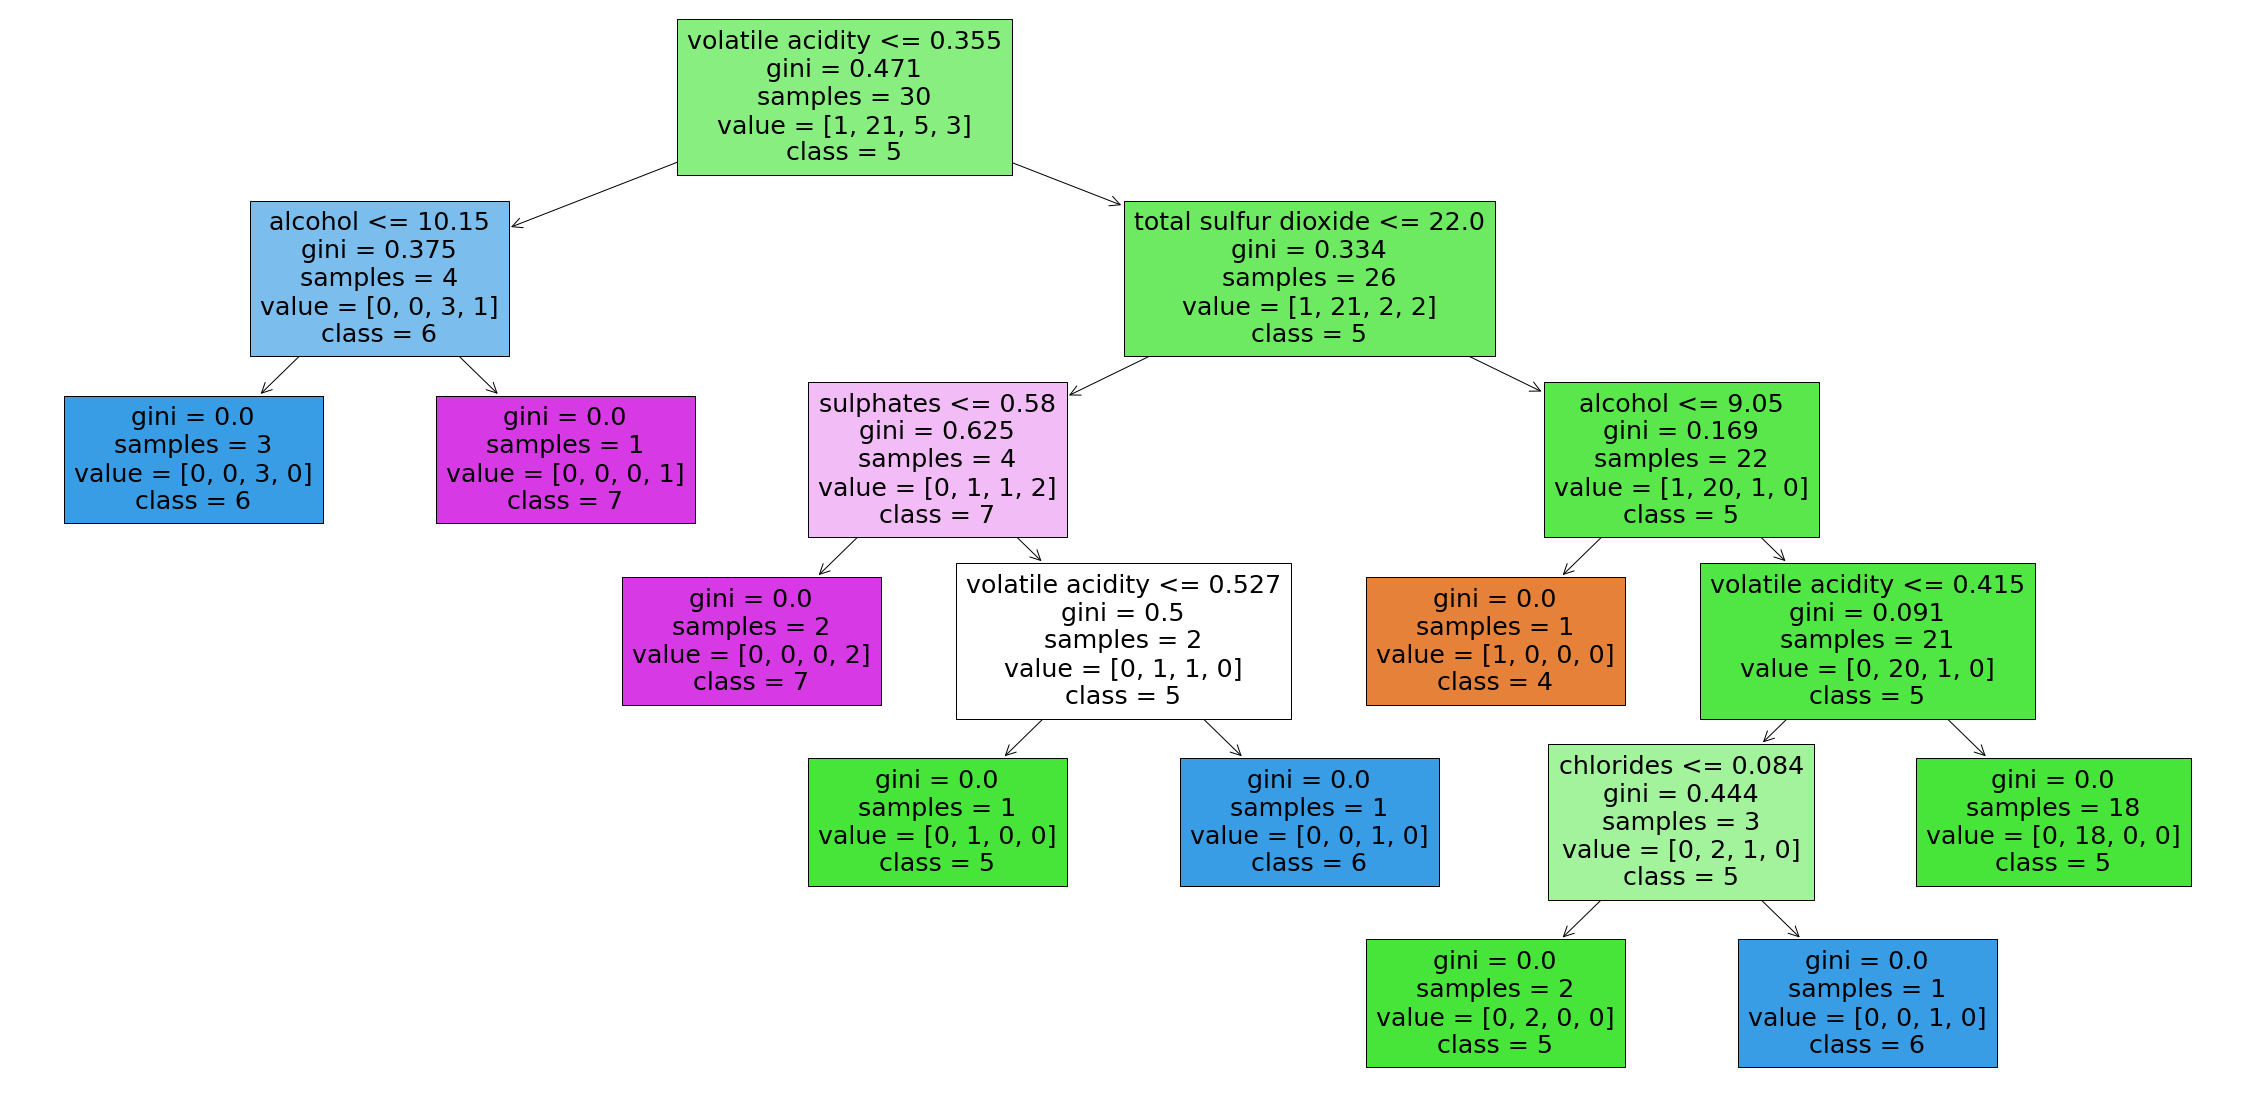

In [21]:
plt.figure(figsize =(40,20))
tree.plot_tree(dt_model1, filled = True, class_names= [str(i) for i in set(y1)],feature_names = x1.columns)

In [22]:
y1.unique()

array([5, 6, 7, 4], dtype=int64)

In [23]:
x1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5


In [24]:
dt_model_ccp = DecisionTreeClassifier(random_state= 0, ccp_alpha= 0.14)

In [25]:
dt_model_ccp.fit(x1, y1)

DecisionTreeClassifier(ccp_alpha=0.14, random_state=0)

In [27]:
dt_model_ccp.score(x1, y1 )

0.7

In [50]:
grid_param = {
             "criterion":['gini','entropy'],
             "splitter":['best','random'],
             "max_depth" : range(2,40,2),
             "min_samples_split":range(2,10 ,2),
             "min_samples_leaf":range(1,10,2),
             'ccp_alpha':np.random.rand(0.01,0.05)
    
             }

TypeError: 'float' object cannot be interpreted as an integer

In [47]:
grid_cpp = GridSearchCV(estimator = dt_model_ccp, param_grid = grid_param, cv =5 ,n_jobs = -1, verbose = 2)

In [44]:
grid_cpp.fit(x1, y1)

Fitting 5 folds for each of 218880 candidates, totalling 1094400 fits


C:\Users\SCS\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


KeyboardInterrupt: 